# Library

In [ ]:
import pandas as pd # manipulasi tabel
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from imblearn.combine import SMOTEENN
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # model decision tree

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error

# 1. Dataset

In [ ]:
df = pd.read_csv("diabetes_data_upload.csv")
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital_thrush      520 non-null    object
 8   visual_blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed_healing     520 non-null    object
 12  partial_paresis     520 non-null    object
 13  muscle_stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
 16  class               520 no

In [ ]:
df.describe()

,age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


# 2. Preprocessing

Output (hasil akhir) dari tahap preprocessing:


*   `df2` = dataset hasil encoding
*   `df3` = dataset hasil resample



## 2.1 Missing values

In [ ]:
df.isna().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
class                 0
dtype: int64

## 2.2 Data duplikat


In [ ]:
df[df.duplicated()]

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
84,35,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
159,38,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
160,28,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive
161,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
162,35,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53,Male,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
497,47,Male,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,Yes,Negative
498,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
499,64,Male,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Negative


In [ ]:
df = df.drop_duplicates()
df.info() # menampilkan info dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 251 non-null    int64 
 1   gender              251 non-null    object
 2   polyuria            251 non-null    object
 3   polydipsia          251 non-null    object
 4   sudden_weight_loss  251 non-null    object
 5   weakness            251 non-null    object
 6   polyphagia          251 non-null    object
 7   genital_thrush      251 non-null    object
 8   visual_blurring     251 non-null    object
 9   itching             251 non-null    object
 10  irritability        251 non-null    object
 11  delayed_healing     251 non-null    object
 12  partial_paresis     251 non-null    object
 13  muscle_stiffness    251 non-null    object
 14  alopecia            251 non-null    object
 15  obesity             251 non-null    object
 16  class               251 no

## 2.3 Encoding


In [ ]:
df2 = pd.DataFrame()

Membuat dataset baru `df2` untuk menampung hasil encode

### 2.3.1 `gender`

Meng-encode "Male" menjadi 1 dan "Female" menjadi 0

In [ ]:
df2["gender"] = df.gender.map({"Male":1, "Female":0})
df2.head()

,gender
0,1
1,1
2,1
3,1
4,1


### 2.3.2 categorical columns

Meng-encode "Ya" menjadi 1 dan "No" menjadi 0

In [ ]:
for n in df.columns[2:16]:
  print(n)

polyuria
polydipsia
sudden_weight_loss
weakness
polyphagia
genital_thrush
visual_blurring
itching
irritability
delayed_healing
partial_paresis
muscle_stiffness
alopecia
obesity


In [ ]:
for column in df.columns[2:16]:
  df2[column] = df[column].map({"Yes":1, "No":0})

In [ ]:
df2.head()

,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


### 2.3.3 `age`

Kita tidak meng-encode column ini, hanya memasukkan saja dari `df`

In [ ]:
df2["age"] = df["age"]

### 2.3.4 `class`

Meng-encode "Positive" menjadi 1 dan "Negative" menjadi 0

In [ ]:
df2["class"] = df["class"].map({"Positive":1 , "Negative":0})

### 2.3.5 Dataset yang telah di-encode

In [ ]:
df2.head()

,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,age,class
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,40,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,58,1
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,41,1
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,45,1
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,60,1


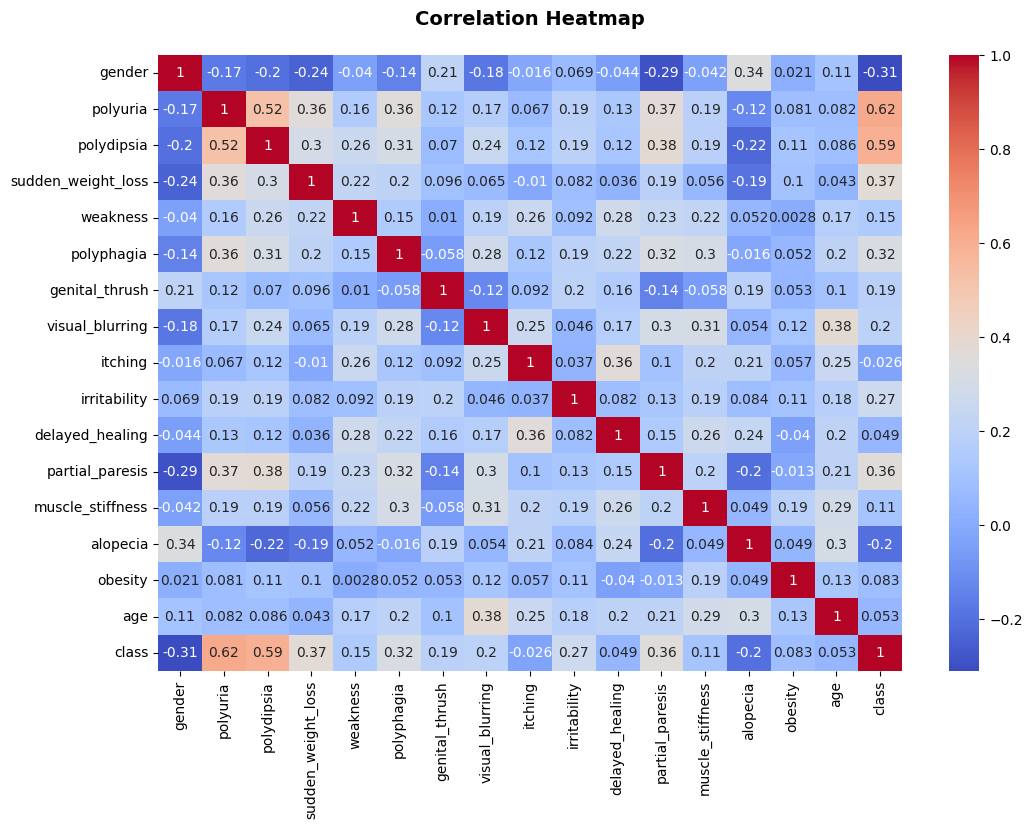

In [ ]:
plt.figure(figsize=(12,8))
sn.heatmap(df2.corr(),annot=True, cmap ='coolwarm')
plt.title('Correlation Heatmap\n',fontweight='bold',fontsize=14)
plt.show()

## 2.4 Data Imbalance

In [ ]:
df2["class"].value_counts()

1    173
0     78
Name: class, dtype: int64

<Axes: ylabel='class'>

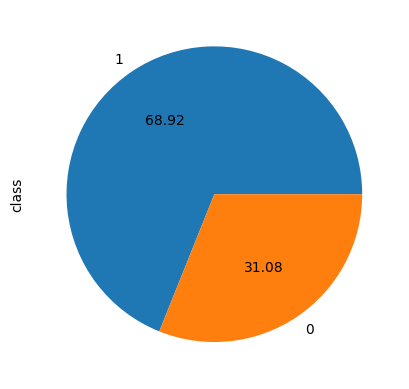

In [ ]:
df2["class"].value_counts().plot.pie(autopct='%.2f')

In [ ]:
X = df2.drop(["class"], axis=1)
y = df2["class"]

In [ ]:
# resampler = RandomUnderSampler(random_state=42)
resampler = RandomOverSampler(random_state=42)
# resampler = SMOTE(random_state=42)
# resampler = SMOTEENN(random_state=42)

In [ ]:
X_res, y_res = resampler.fit_resample(X, y)

In [ ]:
y_res.value_counts()

1    173
0    173
Name: class, dtype: int64

### 2.4.1 Dataset yang telah di-resample (`df3`)

In [ ]:
df3 = X_res
df3["class"] = y_res
df3

,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,age,class
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,40,1
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,58,1
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,41,1
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,45,1
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,58,0
342,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0
343,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0
344,1,0,0,0,1,0,0,0,1,0,1,1,1,1,0,50,0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   gender              346 non-null    int64
 1   polyuria            346 non-null    int64
 2   polydipsia          346 non-null    int64
 3   sudden_weight_loss  346 non-null    int64
 4   weakness            346 non-null    int64
 5   polyphagia          346 non-null    int64
 6   genital_thrush      346 non-null    int64
 7   visual_blurring     346 non-null    int64
 8   itching             346 non-null    int64
 9   irritability        346 non-null    int64
 10  delayed_healing     346 non-null    int64
 11  partial_paresis     346 non-null    int64
 12  muscle_stiffness    346 non-null    int64
 13  alopecia            346 non-null    int64
 14  obesity             346 non-null    int64
 15  age                 346 non-null    int64
 16  class               346 non-null    int64
dt

### 2.4.2 Perbandingan Gender

In [ ]:
df3["gender"].value_counts()

1    239
0    107
Name: gender, dtype: int64

In [ ]:
male_positive = df3[(df3["gender"] == 1) & (df3["class"] == 1)]
male_negative = df3[(df3["gender"] == 1) & (df3["class"] == 0)]
female_positive = df3[(df3["gender"] == 0) & (df3["class"] == 1)]
female_negative = df3[(df3["gender"] == 0) & (df3["class"] == 0)]

print("Male yang positif: ", len(male_positive))
print("Male yang negatif: ", len(male_negative))
print("Female yang positif: ", len(female_positive))
print("Female yang negatif: ", len(female_negative))

Male yang positif:  93
Male yang negatif:  146
Female yang positif:  80
Female yang negatif:  27


<Axes: ylabel='Frequency'>

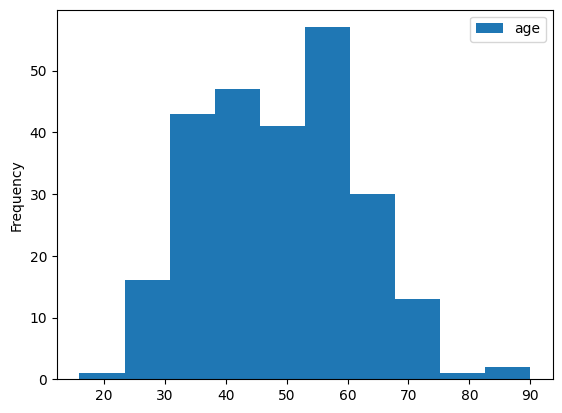

In [ ]:
df.plot.hist()

## 2.5 Import dataset final

In [ ]:
# df3.pd.DataFrame.to_csv(index_label=False)
df3.to_csv("diabetes_data_final.csv", index=None)

# 3. Modelling

## 3.1 Split data

In [ ]:
X = df3.drop(["class"], axis=1)
y = df3["class"]

In [ ]:
X.head()

,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,age
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,40
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,58
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,41
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,45
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,60


In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("Y_train: ", len(y_train))
print("Y_test: ", len(y_test))

X_train:  242
X_test:  104
Y_train:  242
Y_test:  104


In [ ]:
X_test.head()

,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,age
108,0,1,1,0,0,1,0,1,0,1,1,1,1,0,0,39
158,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,54
278,1,0,0,1,1,1,0,1,1,0,1,0,1,1,0,56
209,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,35
320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33


## 3.2 Pemanggilan dan training data

In [ ]:
model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    )

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# 4. Evaluation

## 4.1 Evaluasi

In [ ]:
accuracy_training = accuracy_score(y_train, y_train_pred)
accuracy_testing = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy score (training): ", accuracy_training*100)
print("Accuracy score (testing): ", accuracy_testing*100)
print("Mean squared error: ", mse*100)
print("Classification report: \n", classification)

Accuracy score (training):  96.69421487603306
Accuracy score (testing):  92.3076923076923
Mean squared error:  7.6923076923076925
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92        48
           1       0.98      0.88      0.92        56

    accuracy                           0.92       104
   macro avg       0.93      0.93      0.92       104
weighted avg       0.93      0.92      0.92       104



Evaluasi akurasi berdasarkan strategi *resampling*:

*   SMOTE-ENN = 100%
*   SMOTE = 90,38%
*   RandomOverSampler = 92,30%
*   RandomUnderSampler = 82,97%

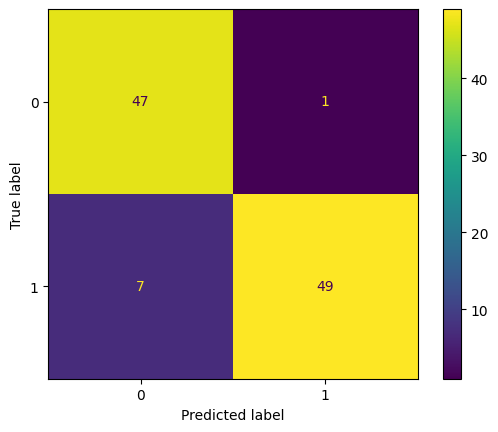

In [ ]:
cfdisplay = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=model.classes_)
cfdisplay.plot()
plt.show()

<Axes: >

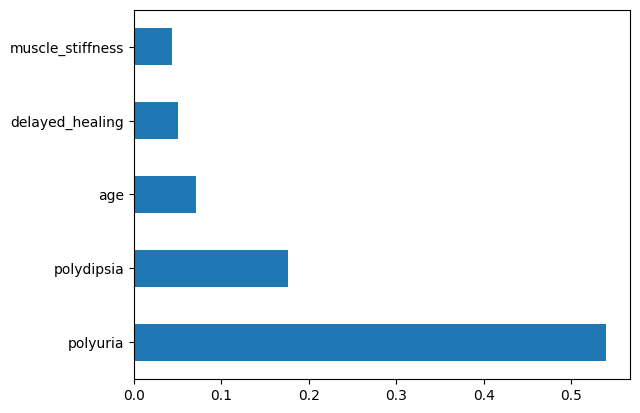

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='barh')